In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import ParameterGrid


In [189]:
df = pd.read_csv('final_combined_dataset.csv')


In [190]:
df = df.drop(columns=['nearby_cases_weighted','city'])

In [191]:
df.head(10)

,date,week,cases,population,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,geocode,vim,vim_monthly,precipitation_avg_ordinary_kriging,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,long,lat,cases_per_100k
0,2012-01-01,201201,32,207044,19.000000,79.428571,55.514486,35.000000,25.048951,29.571429,3300100,0.850500,0.852633,5.6804,18.3375,5.2038,18.7979,-44.319627,-23.009116,15.455652
1,2012-01-08,201202,40,207044,19.714286,82.285714,62.357393,47.428571,23.737513,26.571429,3300100,0.852050,0.852633,4.0716,16.5375,3.9114,16.8583,-44.319627,-23.009116,19.319565
2,2012-01-15,201203,19,207044,20.000000,83.000000,65.236264,45.571429,24.413187,28.714286,3300100,0.853541,0.852633,2.0555,5.0500,1.7556,3.1368,-44.319627,-23.009116,9.176793
3,2012-01-22,201204,33,207044,19.285714,83.000000,60.362637,43.428571,24.879121,28.857143,3300100,0.854877,0.852633,1.5416,5.7059,1.4138,5.2767,-44.319627,-23.009116,15.938641
4,2012-01-29,201205,36,207044,18.857143,80.857143,50.885924,33.142857,25.989992,30.428571,3300100,0.856021,0.852633,2.8204,9.3826,2.0057,7.8749,-44.319627,-23.009116,17.387608
5,2012-02-05,201206,39,207044,19.571429,81.571429,43.494048,22.142857,28.614927,33.571429,3300100,0.857159,0.858000,3.8170,25.9830,3.8228,26.0478,-44.319627,-23.009116,18.836576
6,2012-02-12,201207,37,207044,20.142857,80.142857,56.778911,40.571429,25.791314,29.571429,3300100,0.858241,0.858000,4.0861,29.4086,4.0920,29.0110,-44.319627,-23.009116,17.870598
7,2012-02-19,201208,33,207044,21.857143,74.000000,51.458425,34.428571,27.253296,31.285714,3300100,0.859142,0.858000,0.5962,4.0133,0.4783,3.2643,-44.319627,-23.009116,15.938641
8,2012-02-26,201209,46,207044,20.714286,80.142857,43.760989,21.285714,28.902930,34.000000,3300100,0.860082,0.858000,0.8143,3.8456,0.8171,3.8703,-44.319627,-23.009116,22.217500
9,2012-03-04,201210,42,207044,20.428571,71.714286,48.333639,28.428571,26.467491,30.857143,3300100,0.860933,0.861567,1.1867,5.3867,0.6647,3.8741,-44.319627,-23.009116,20.285543


In [192]:
df['week'] = pd.to_numeric(df['week'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52234 entries, 0 to 52233
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  52234 non-null  datetime64[ns]
 1   week                                  52234 non-null  int64         
 2   cases                                 52234 non-null  int64         
 3   population                            52234 non-null  int64         
 4   tempe_min                             52234 non-null  float64       
 5   humidity_max                          52234 non-null  float64       
 6   humidity_avg                          52234 non-null  float64       
 7   humidity_min                          52234 non-null  float64       
 8   temp_avg                              52234 non-null  float64       
 9   temp_max                              52234 non-null  float64       
 10

In [194]:
# columns = df.columns
# print(columns)
# geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]
geocode_list = [3303807]

df = df[df['geocode'].isin(geocode_list)]
df

,date,week,cases,population,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,geocode,vim,vim_monthly,precipitation_avg_ordinary_kriging,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,long,lat,cases_per_100k
29274,2012-01-01,201201,1,43680,19.000000,79.428571,55.514486,35.000000,25.048951,29.571429,3303807,0.855100,0.857400,5.6804,18.3375,5.1961,18.8053,-44.710859,-23.219414,2.289377
29275,2012-01-08,201202,0,43680,19.714286,82.285714,62.357393,47.428571,23.737513,26.571429,3303807,0.856901,0.857400,3.9412,16.5375,3.8584,16.8635,-44.710859,-23.219414,0.000000
29276,2012-01-15,201203,2,43680,20.000000,83.000000,65.236264,45.571429,24.413187,28.714286,3303807,0.858424,0.857400,1.5898,5.0500,1.5104,3.1058,-44.710859,-23.219414,4.578755
29277,2012-01-22,201204,3,43680,19.285714,83.000000,60.362637,43.428571,24.879121,28.857143,3303807,0.859670,0.857400,1.1766,4.2096,1.0966,3.8643,-44.710859,-23.219414,6.868132
29278,2012-01-29,201205,2,43680,18.857143,80.857143,50.885924,33.142857,25.989992,30.428571,3303807,0.860821,0.857400,2.5209,6.8886,1.6488,5.7608,-44.710859,-23.219414,4.578755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29843,2022-11-27,202248,0,43680,18.857143,99.151789,79.717112,62.238677,23.775511,27.857143,3303807,0.842971,0.838300,4.9788,17.2846,5.2366,18.7300,-44.710859,-23.219414,0.000000
29844,2022-12-04,202249,3,43680,20.285714,100.000000,77.826146,58.211681,25.071428,28.857143,3303807,0.845124,0.847733,1.8253,8.1846,1.6286,7.5757,-44.710859,-23.219414,6.868132
29845,2022-12-11,202250,3,43680,18.833333,98.002307,77.462712,61.559047,23.904762,27.833333,3303807,0.847373,0.847733,3.2077,13.9077,2.1048,10.0949,-44.710859,-23.219414,6.868132
29846,2022-12-18,202251,8,43680,19.500000,96.987255,82.448150,74.983709,22.517858,24.500000,3303807,0.849676,0.847733,2.4548,6.2721,2.5137,6.5264,-44.710859,-23.219414,18.315018


In [195]:
# geocode_list = [3300407, 3300456, 3302007, 3302205, 3303807]

geocode_list = [3303807]
df = df[df['geocode'].isin(geocode_list)]

lag_columns = ['cases_lag1', 'cases_lag2', 'cases_lag3', 'cases_lag4']

df = df.groupby('geocode', group_keys=False).apply(lambda group: group.assign(
    cases_lag1=group['cases'].shift(1),
    cases_lag2=group['cases'].shift(2),
    cases_lag3=group['cases'].shift(3),
    cases_lag4=group['cases'].shift(4)
))

df = df.groupby('geocode', group_keys=False).apply(lambda group: group.iloc[4:].reset_index(drop=True))

df = df.groupby('geocode', group_keys=False).apply(lambda group: group.iloc[:-4])

df.reset_index(drop=True, inplace=True)

df



C:\Users\user\AppData\Local\Temp\ipykernel_3976\1988148731.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('geocode', group_keys=False).apply(lambda group: group.assign(
C:\Users\user\AppData\Local\Temp\ipykernel_3976\1988148731.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('geocode', group_keys=False).apply(lambda group: group.iloc[4:].reset_index(drop=True))
C:\U

,date,week,cases,population,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,...,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,long,lat,cases_per_100k,cases_lag1,cases_lag2,cases_lag3,cases_lag4
0,2012-01-29,201205,2,43680,18.857143,80.857143,50.885924,33.142857,25.989992,30.428571,...,6.8886,1.6488,5.7608,-44.710859,-23.219414,4.578755,3.0,2.0,0.0,1.0
1,2012-02-05,201206,1,43680,19.571429,81.571429,43.494048,22.142857,28.614927,33.571429,...,45.6061,6.5742,45.6100,-44.710859,-23.219414,2.289377,2.0,3.0,2.0,0.0
2,2012-02-12,201207,3,43680,20.142857,80.142857,56.778911,40.571429,25.791314,29.571429,...,40.4138,5.5572,40.6955,-44.710859,-23.219414,6.868132,1.0,2.0,3.0,2.0
3,2012-02-19,201208,3,43680,21.857143,74.000000,51.458425,34.428571,27.253296,31.285714,...,4.0133,0.4765,3.2529,-44.710859,-23.219414,6.868132,3.0,1.0,2.0,3.0
4,2012-02-26,201209,2,43680,20.714286,80.142857,43.760989,21.285714,28.902930,34.000000,...,6.1181,1.2145,6.1196,-44.710859,-23.219414,4.578755,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2022-10-30,202244,15,43680,16.285714,98.245329,78.428065,61.204552,20.429847,23.857143,...,11.0998,4.0180,11.0908,-44.710859,-23.219414,34.340659,7.0,5.0,3.0,3.0
562,2022-11-06,202245,10,43680,17.000000,100.000000,77.539105,62.516369,21.608164,24.857143,...,15.3385,3.1645,15.5487,-44.710859,-23.219414,22.893773,15.0,7.0,5.0,3.0
563,2022-11-13,202246,11,43680,17.714286,96.649262,74.159889,55.949693,23.163265,27.142857,...,8.7479,1.4788,8.1955,-44.710859,-23.219414,25.183150,10.0,15.0,7.0,5.0
564,2022-11-20,202247,7,43680,18.428571,98.300020,72.456695,48.980015,24.178572,28.857143,...,14.9501,2.7884,14.5854,-44.710859,-23.219414,16.025641,11.0,10.0,15.0,7.0


In [196]:
train_df = df[df['date'].dt.year <= 2020]
test_df = df[df['date'].dt.year >= 2021]

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (466, 24)
Test set shape: (100, 24)


In [197]:
X_train = train_df.drop(columns=['geocode','cases_per_100k','week'])
y_train = train_df[['cases']]

X_test = test_df.drop(columns=['geocode','cases_per_100k','week'])
y_test = test_df[['cases']]

In [198]:
df = df.drop(columns=['geocode','cases_per_100k','week'])

In [199]:
feature_cols = [
     'date','cases','temp_avg', 'humidity_avg',
    'precipitation_max_regression_kriging'  ,'cases_lag1'
     ,'cases_lag2'
     ,'cases_lag3'
     , 'cases_lag4'
]

df = df[feature_cols]

# Verify the new shapes
print(df.shape)

(566, 9)


In [200]:
df

,date,cases,temp_avg,humidity_avg,precipitation_max_regression_kriging,cases_lag1,cases_lag2,cases_lag3,cases_lag4
0,2012-01-29,2,25.989992,50.885924,5.7608,3.0,2.0,0.0,1.0
1,2012-02-05,1,28.614927,43.494048,45.6100,2.0,3.0,2.0,0.0
2,2012-02-12,3,25.791314,56.778911,40.6955,1.0,2.0,3.0,2.0
3,2012-02-19,3,27.253296,51.458425,3.2529,3.0,1.0,2.0,3.0
4,2012-02-26,2,28.902930,43.760989,6.1196,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
561,2022-10-30,15,20.429847,78.428065,11.0908,7.0,5.0,3.0,3.0
562,2022-11-06,10,21.608164,77.539105,15.5487,15.0,7.0,5.0,3.0
563,2022-11-13,11,23.163265,74.159889,8.1955,10.0,15.0,7.0,5.0
564,2022-11-20,7,24.178572,72.456695,14.5854,11.0,10.0,15.0,7.0


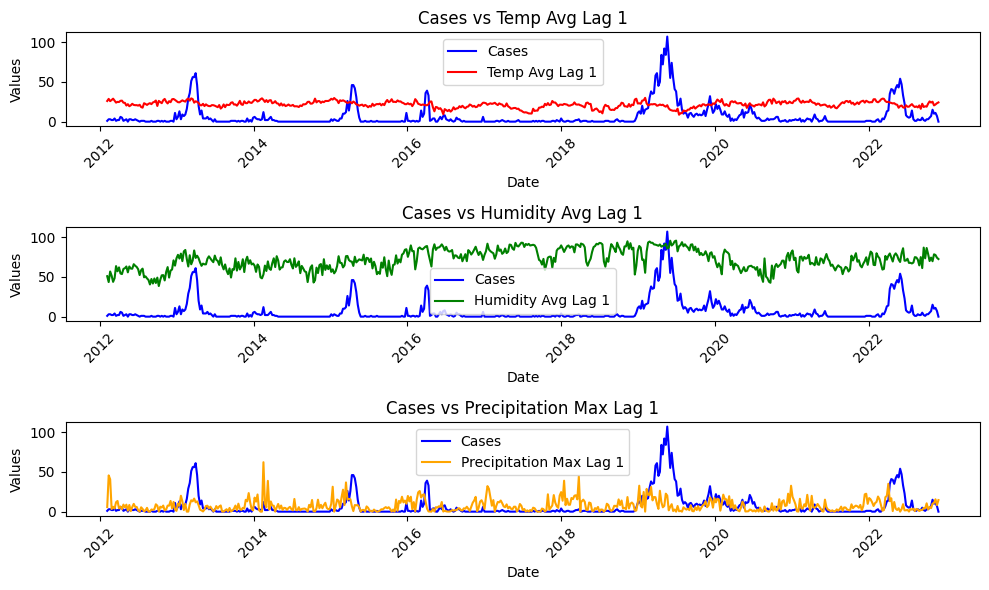

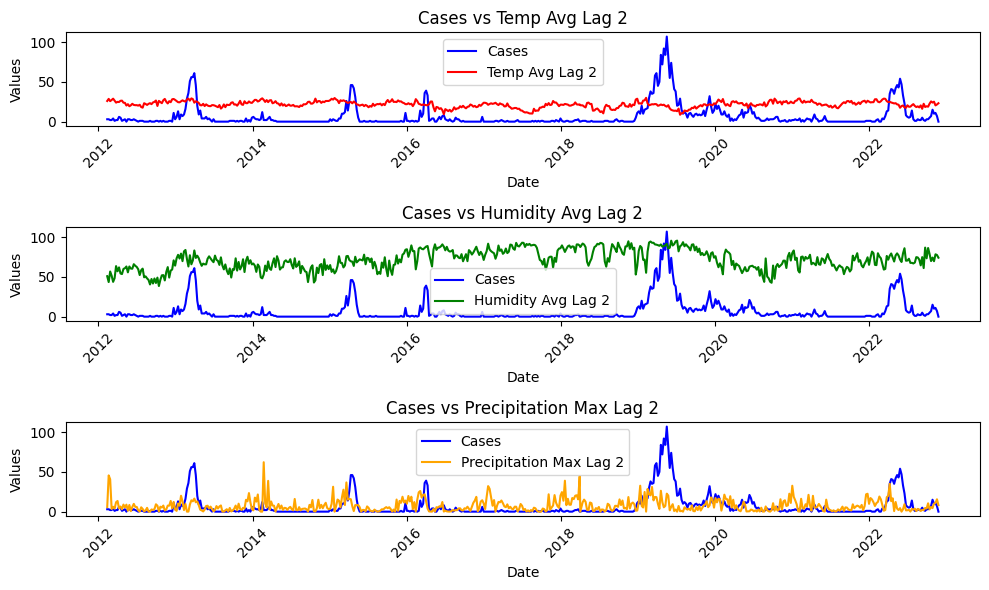

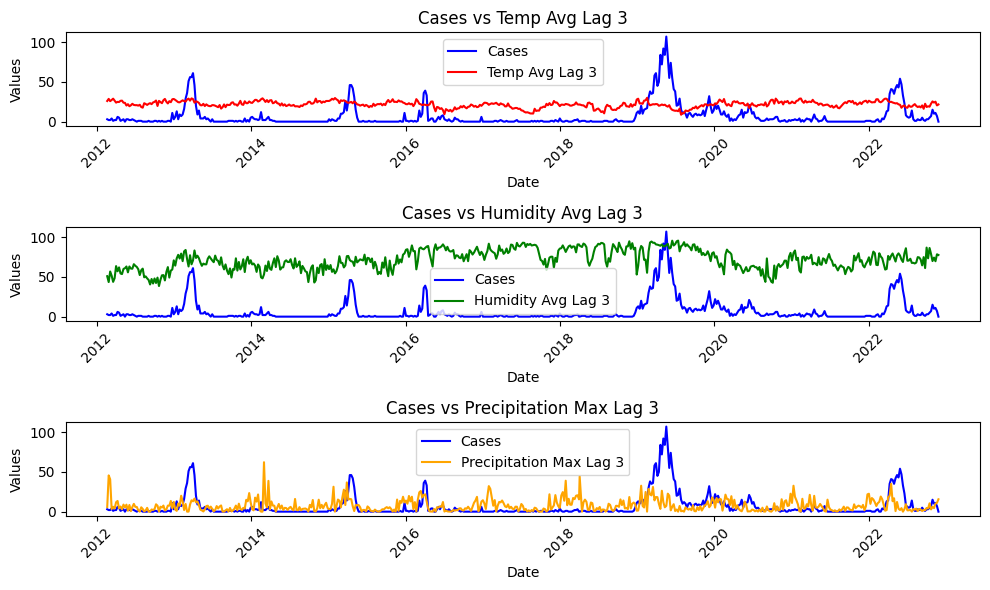

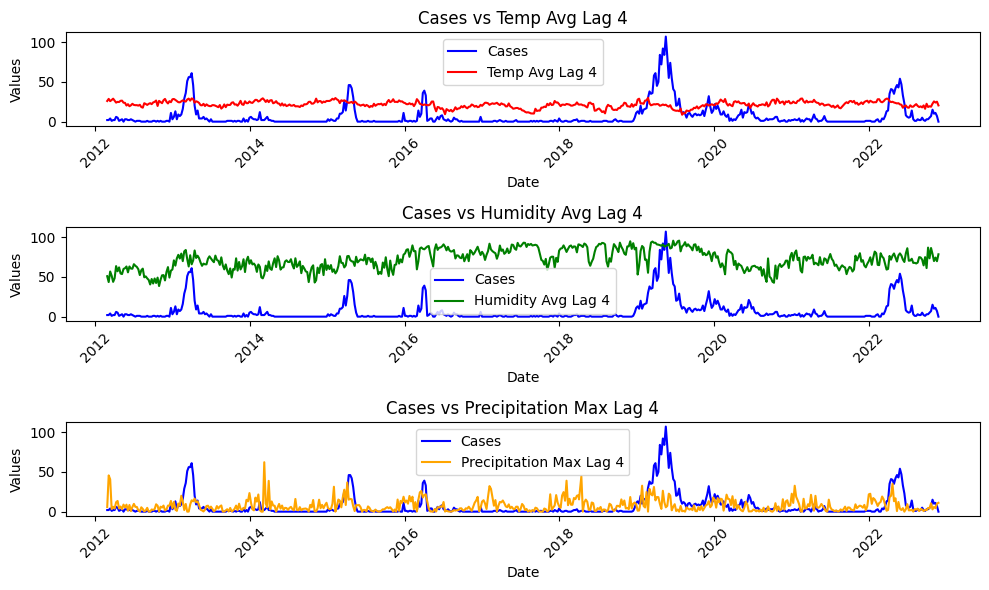

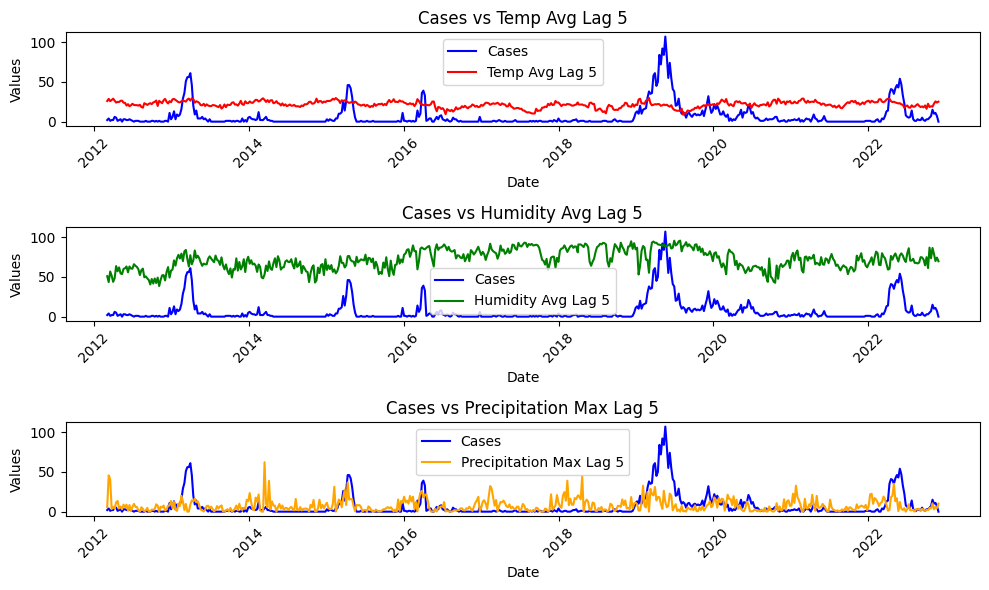

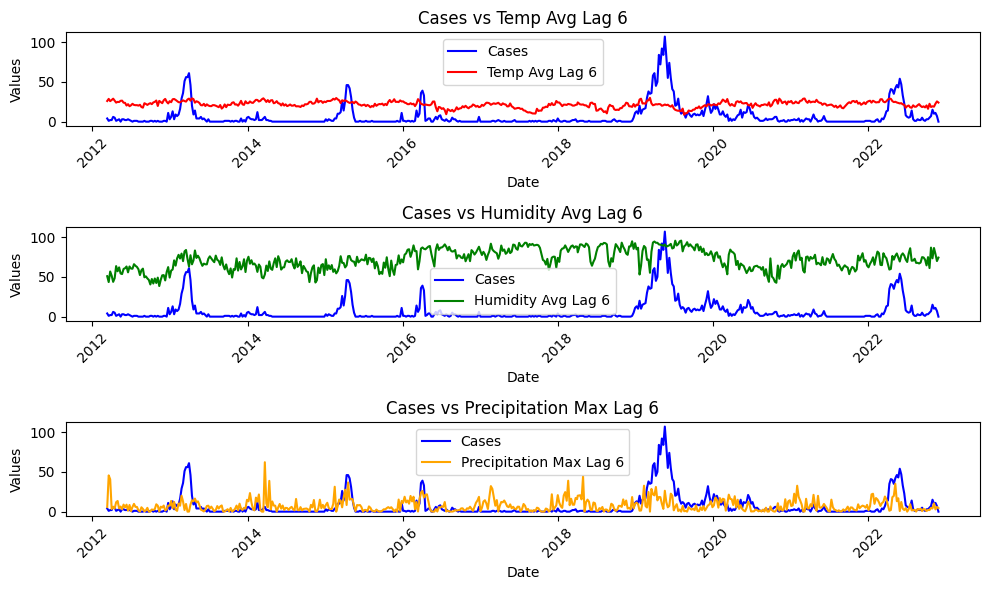

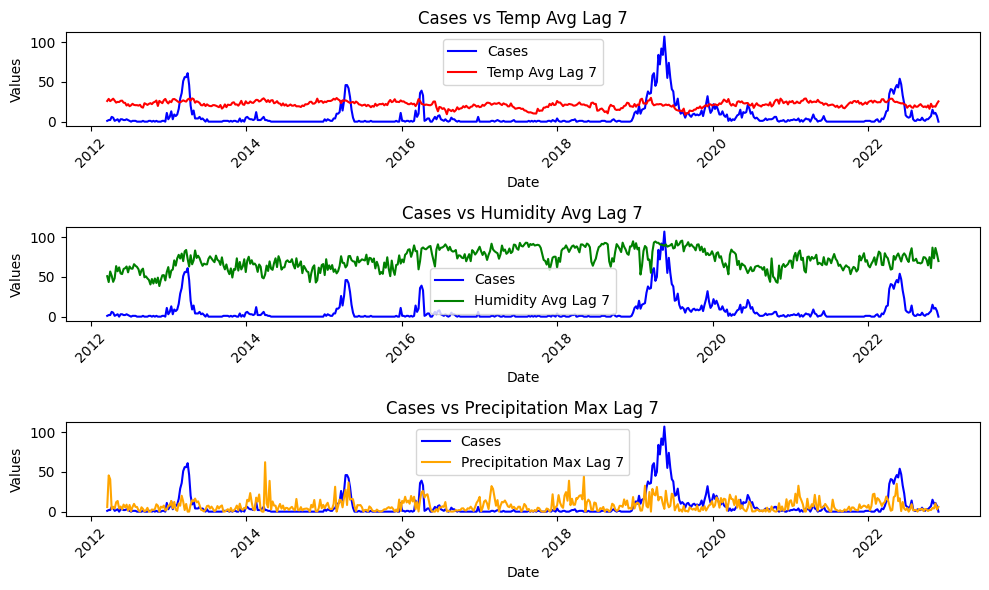

In [201]:
import matplotlib.pyplot as plt

# Create copies of the original dataframe for each lag
df_lag = {}
for lag in range(1, 8):
    df_lag[lag] = df.copy()

# Create lag columns for temperature, humidity, and precipitation
for lag in range(1, 8):
    df_lag[lag]['temp_avg_lag' + str(lag)] = df_lag[lag]['temp_avg'].shift(lag)
    df_lag[lag]['humidity_avg_lag' + str(lag)] = df_lag[lag]['humidity_avg'].shift(lag)
    df_lag[lag]['precipitation_max_regression_kriging_lag' + str(lag)] = df_lag[lag]['precipitation_max_regression_kriging'].shift(lag)

# Drop rows with NaN values that result from the shifting operation
for lag in range(1, 8):
    df_lag[lag] = df_lag[lag].dropna(subset=[
        'temp_avg_lag' + str(lag),
        'humidity_avg_lag' + str(lag),
        'precipitation_max_regression_kriging_lag' + str(lag)
    ])

# Function to plot cases vs lagged variables
def plot_cases_vs_lagged_variable(lag):
    plt.figure(figsize=(10, 6))
    
    # Plot Cases vs. Temp Avg Lag
    plt.subplot(3, 1, 1)
    plt.plot(df_lag[lag]['date'], df_lag[lag]['cases'], label='Cases', color='blue')
    plt.plot(df_lag[lag]['date'], df_lag[lag]['temp_avg_lag' + str(lag)], label='Temp Avg Lag ' + str(lag), color='red')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Cases vs Temp Avg Lag {lag}')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Plot Cases vs. Humidity Avg Lag
    plt.subplot(3, 1, 2)
    plt.plot(df_lag[lag]['date'], df_lag[lag]['cases'], label='Cases', color='blue')
    plt.plot(df_lag[lag]['date'], df_lag[lag]['humidity_avg_lag' + str(lag)], label='Humidity Avg Lag ' + str(lag), color='green')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Cases vs Humidity Avg Lag {lag}')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Plot Cases vs. Precipitation Max Lag
    plt.subplot(3, 1, 3)
    plt.plot(df_lag[lag]['date'], df_lag[lag]['cases'], label='Cases', color='blue')
    plt.plot(df_lag[lag]['date'], df_lag[lag]['precipitation_max_regression_kriging_lag' + str(lag)], label='Precipitation Max Lag ' + str(lag), color='orange')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Cases vs Precipitation Max Lag {lag}')
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Loop to plot for all lags from 1 to 7
for lag in range(1, 8):
    plot_cases_vs_lagged_variable(lag)


In [202]:
df_lag[4]

,date,cases,temp_avg,humidity_avg,precipitation_max_regression_kriging,cases_lag1,cases_lag2,cases_lag3,cases_lag4,temp_avg_lag4,humidity_avg_lag4,precipitation_max_regression_kriging_lag4
4,2012-02-26,2,28.902930,43.760989,6.1196,3.0,3.0,1.0,2.0,25.989992,50.885924,5.7608
5,2012-03-04,2,26.467491,48.333639,3.8511,2.0,3.0,3.0,1.0,28.614927,43.494048,45.6100
6,2012-03-11,4,23.960826,63.594075,11.8593,2.0,2.0,3.0,3.0,25.791314,56.778911,40.6955
7,2012-03-18,1,24.854557,57.080533,13.4234,4.0,2.0,2.0,3.0,27.253296,51.458425,3.2529
8,2012-03-25,2,24.681663,61.958565,4.1161,1.0,4.0,2.0,2.0,28.902930,43.760989,6.1196
...,...,...,...,...,...,...,...,...,...,...,...,...
561,2022-10-30,15,20.429847,78.428065,11.0908,7.0,5.0,3.0,3.0,22.591837,78.767774,2.8226
562,2022-11-06,10,21.608164,77.539105,15.5487,15.0,7.0,5.0,3.0,25.469388,69.930714,5.8988
563,2022-11-13,11,23.163265,74.159889,8.1955,10.0,15.0,7.0,5.0,24.017007,74.284890,4.4469
564,2022-11-20,7,24.178572,72.456695,14.5854,11.0,10.0,15.0,7.0,25.122449,69.711634,10.1235


In [203]:
feature_cols = [
     'date','cases','temp_avg_lag4', 'humidity_avg_lag4',
    'precipitation_max_regression_kriging_lag4'  ,'cases_lag1'
     ,'cases_lag2'
     ,'cases_lag3'
     , 'cases_lag4'
]

df_lag4 = df_lag[4][feature_cols]

# Verify the new shapes
print(df_lag4.shape)

(562, 9)


In [204]:
df_lag4

,date,cases,temp_avg_lag4,humidity_avg_lag4,precipitation_max_regression_kriging_lag4,cases_lag1,cases_lag2,cases_lag3,cases_lag4
4,2012-02-26,2,25.989992,50.885924,5.7608,3.0,3.0,1.0,2.0
5,2012-03-04,2,28.614927,43.494048,45.6100,2.0,3.0,3.0,1.0
6,2012-03-11,4,25.791314,56.778911,40.6955,2.0,2.0,3.0,3.0
7,2012-03-18,1,27.253296,51.458425,3.2529,4.0,2.0,2.0,3.0
8,2012-03-25,2,28.902930,43.760989,6.1196,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
561,2022-10-30,15,22.591837,78.767774,2.8226,7.0,5.0,3.0,3.0
562,2022-11-06,10,25.469388,69.930714,5.8988,15.0,7.0,5.0,3.0
563,2022-11-13,11,24.017007,74.284890,4.4469,10.0,15.0,7.0,5.0
564,2022-11-20,7,25.122449,69.711634,10.1235,11.0,10.0,15.0,7.0


In [205]:
# import pandas as pd

# # Assuming you already have your original DataFrame called `df`

# # Lag the features by 3 weeks, 4 weeks, and 5 weeks
# df_lag4 = df.copy()
# df_lag5 = df.copy()

# # Creating lag columns for temperature, humidity, and precipitation


# df_lag4['temp_avg_lag4'] = df_lag4['temp_avg'].shift(4)
# df_lag4['humidity_avg_lag4'] = df_lag4['humidity_avg'].shift(4)
# df_lag4['precipitation_max_regression_kriging_lag4'] = df_lag4['precipitation_max_regression_kriging'].shift(4)

# df_lag5['temp_avg_lag5'] = df_lag5['temp_avg'].shift(5)
# df_lag5['humidity_avg_lag5'] = df_lag5['humidity_avg'].shift(5)
# df_lag5['precipitation_max_regression_kriging_lag5'] = df_lag5['precipitation_max_regression_kriging'].shift(5)

# # Drop rows with NaN values that result from the shifting operation
# df_lag4 = df_lag4.dropna(subset=['temp_avg_lag4', 'humidity_avg_lag4', 'precipitation_max_regression_kriging_lag4'])
# df_lag5 = df_lag5.dropna(subset=['temp_avg_lag5', 'humidity_avg_lag5', 'precipitation_max_regression_kriging_lag5'])

# # Now you have three separate DataFrames for each lag time (3, 4, and 5 weeks)
# # You can proceed with your analysis on these DataFrames


In [206]:
# df_lag4

In [207]:
feature_cols = [
     'date','cases','temp_avg_lag4', 'humidity_avg_lag4',
    'precipitation_max_regression_kriging_lag4'  ,'cases_lag1'
     ,'cases_lag2'
     ,'cases_lag3'
     , 'cases_lag4'
]

df_lag4 = df_lag4[feature_cols]

# Verify the new shapes
print(df_lag4.shape)
df = df_lag4
df

(562, 9)


,date,cases,temp_avg_lag4,humidity_avg_lag4,precipitation_max_regression_kriging_lag4,cases_lag1,cases_lag2,cases_lag3,cases_lag4
4,2012-02-26,2,25.989992,50.885924,5.7608,3.0,3.0,1.0,2.0
5,2012-03-04,2,28.614927,43.494048,45.6100,2.0,3.0,3.0,1.0
6,2012-03-11,4,25.791314,56.778911,40.6955,2.0,2.0,3.0,3.0
7,2012-03-18,1,27.253296,51.458425,3.2529,4.0,2.0,2.0,3.0
8,2012-03-25,2,28.902930,43.760989,6.1196,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
561,2022-10-30,15,22.591837,78.767774,2.8226,7.0,5.0,3.0,3.0
562,2022-11-06,10,25.469388,69.930714,5.8988,15.0,7.0,5.0,3.0
563,2022-11-13,11,24.017007,74.284890,4.4469,10.0,15.0,7.0,5.0
564,2022-11-20,7,25.122449,69.711634,10.1235,11.0,10.0,15.0,7.0


In [208]:
train_df = df[df['date'].dt.year <= 2020]
test_df = df[df['date'].dt.year >= 2021]

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Training set shape: (462, 9)
Test set shape: (100, 9)


In [209]:
X_train = train_df.drop(columns=['cases'])
y_train = train_df[['cases']]

X_test = test_df.drop(columns=['cases'])
y_test = test_df[['cases']]

In [210]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
columns_to_scale = ['cases']
numeric_cols = [
    col for col in df.select_dtypes(include=['float64', 'int64', 'int32']).columns 
    if col not in ['cases'] + columns_to_scale
]
# Scale the selected numeric features
X_train[numeric_cols] = feature_scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = feature_scaler.transform(X_test[numeric_cols])

# Scale the target variable
# y_train = target_scaler.fit_transform(y_train)
# y_test = target_scaler.transform(y_test)

In [219]:
# Check for NaN values in the training data
print(X_train.isna().sum())  # Check for NaN values in the features
print(y_train.isna().sum())  # Check for NaN values in the target variable
# Check exogenous features
print(X_train[['temp_avg_lag4', 'humidity_avg_lag4', 'precipitation_max_regression_kriging_lag4']].dtypes)

print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


date                                         0
temp_avg_lag4                                0
humidity_avg_lag4                            0
precipitation_max_regression_kriging_lag4    0
cases_lag1                                   0
cases_lag2                                   0
cases_lag3                                   0
cases_lag4                                   0
dtype: int64
cases    0
dtype: int64
temp_avg_lag4                                float64
humidity_avg_lag4                            float64
precipitation_max_regression_kriging_lag4    float64
dtype: object


In [220]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(462, 8)
(462, 1)


In [223]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `s

                                     SARIMAX Results                                      
Dep. Variable:                              cases   No. Observations:                  462
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 52)   Log Likelihood               -1122.529
Date:                            Thu, 16 Jan 2025   AIC                           2275.058
Time:                                    13:45:07   BIC                           2333.182
Sample:                                         0   HQIC                          2298.179
                                            - 462                                         
Covariance Type:                              opg                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
date                                       4.701e-18

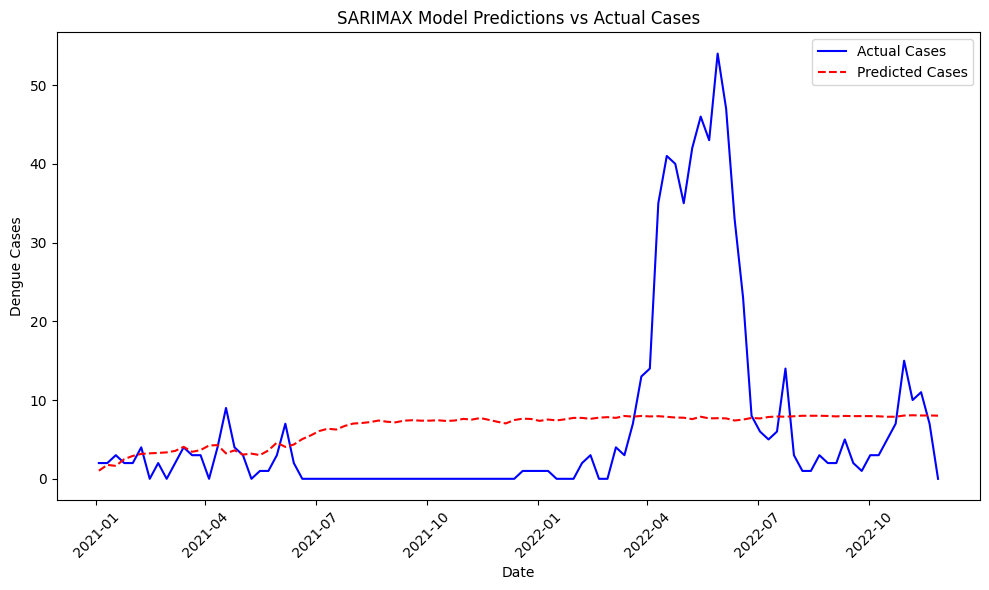

In [224]:
#Set the SARIMAX model with exogenous variables (using seasonal_order if needed)
import statsmodels.api as sm

sarimax_model = sm.tsa.SARIMAX(
    y_train, 
    exog=X_train, 
    order=(2, 0, 1),  # Adjust AR, I, MA orders as needed
    seasonal_order=(2, 0, 1, 52),  # Seasonal order if applicable
    enforce_stationarity=False, 
    enforce_invertibility=False
)

# Fit the model
sarimax_result = sarimax_model.fit(disp=False)

# Forecast on the test data
y_pred = sarimax_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Print model summary
print(sarimax_result.summary())

# Plot the predicted vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_df['date'], y_test, label='Actual Cases', color='blue')
plt.plot(test_df['date'], y_pred, label='Predicted Cases', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.title('SARIMAX Model Predictions vs Actual Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
X_train

,date,temp_avg_lag4,humidity_avg_lag4,precipitation_max_regression_kriging_lag4,cases_lag1,cases_lag2,cases_lag3,cases_lag4
4,2012-02-26,0.813711,0.216770,0.092652,0.028037,0.028037,0.009346,0.018692
5,2012-03-04,0.937349,0.087382,0.733551,0.018692,0.028037,0.028037,0.009346
6,2012-03-11,0.804353,0.319921,0.654511,0.018692,0.018692,0.028037,0.028037
7,2012-03-18,0.873214,0.226791,0.052317,0.037383,0.018692,0.018692,0.028037
8,2012-03-25,0.950914,0.092054,0.098422,0.009346,0.037383,0.018692,0.018692
...,...,...,...,...,...,...,...,...
461,2020-11-29,0.609546,0.484064,0.041514,0.009346,0.009346,0.000000,0.009346
462,2020-12-06,0.788302,0.559166,0.207997,0.018692,0.009346,0.009346,0.000000
463,2020-12-13,0.747658,0.558586,0.229908,0.000000,0.018692,0.009346,0.009346
464,2020-12-20,0.816215,0.397625,0.113983,0.000000,0.000000,0.018692,0.009346


In [214]:
sarimax_model = fit_sarimax(y_train, X_train)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=2894.310, Time=7.38 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3799.981, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2890.812, Time=3.92 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3374.490, Time=3.65 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3886.685, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2890.072, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2890.709, Time=2.25 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=2892.499, Time=5.51 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=2891.817, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=2891.813, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=3372.635, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=2893.813, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[52]             : AIC=2891.135, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[52] intercept
Total fit time: 23.716 seconds


In [215]:

sarimax_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  462
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1442.036
Date:                Thu, 16 Jan 2025   AIC                           2890.072
Time:                        13:13:29   BIC                           2902.479
Sample:                             0   HQIC                          2894.957
                                - 462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4776      0.443      1.078      0.281      -0.391       1.346
ar.L1          0.9266      0.010     97.162      0.000       0.908       0.945
sigma2        29.9741      0.777     38.555      0.000      28.450      31.498
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              3058.97
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               3.19   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [216]:
# Evaluate the fitted SARIMAX model
print("SARIMAX model summary:")
print(sarimax_model.summary())

# Forecast on the test set
y_pred_scaled = sarimax_model.predict(n_periods=len(X_test), X=X_test)

# Inverse transform the predictions and actual values
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = target_scaler.inverse_transform(y_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_df['date'], y_test_original, label='Actual Cases', color='blue')
plt.plot(test_df['date'], y_pred, label='Predicted Cases', color='red')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Actual vs Predicted Cases (SARIMAX)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SARIMAX model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  462
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1442.036
Date:                Thu, 16 Jan 2025   AIC                           2890.072
Time:                        13:13:32   BIC                           2902.479
Sample:                             0   HQIC                          2894.957
                                - 462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4776      0.443      1.078      0.281      -0.391       1.346
ar.L1          0.9266      0.010     97.162      0.000       0.908       0.945
sigma2        29.9741      0.

c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Program Files\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
X = dengue_wk.drop(columns=['dengue_cases'])
y = dengue_wk['dengue_cases']


Z_train, Z_test, y_train, y_test = sarimax_ttsplit('2021', '2022-01', '2022-12', X, y)

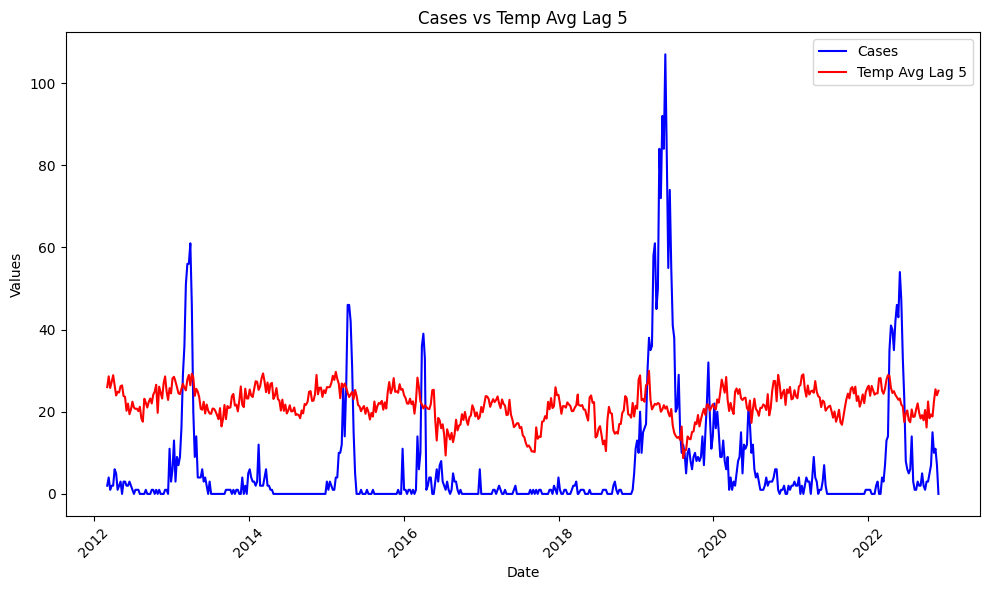

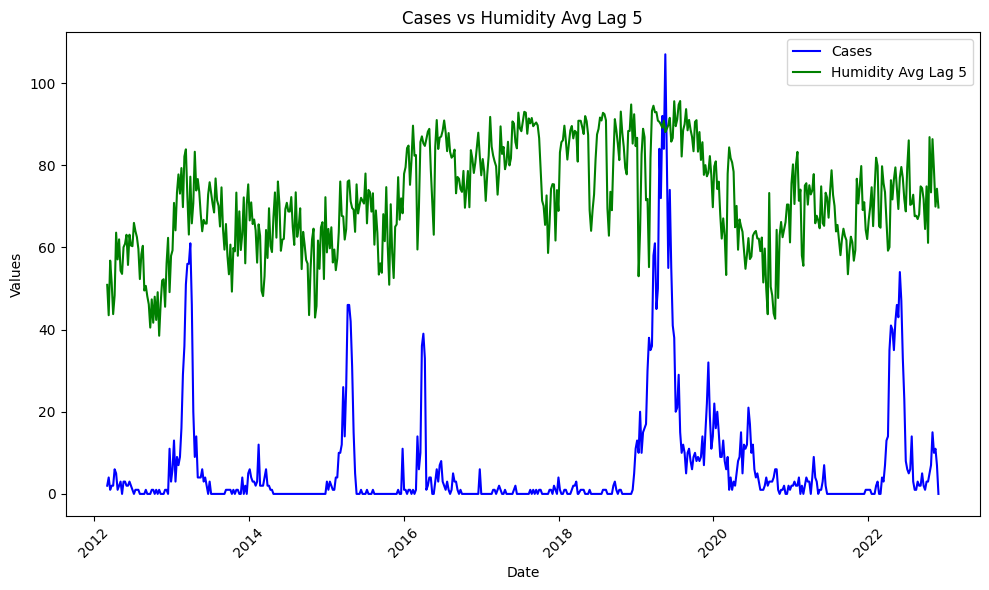

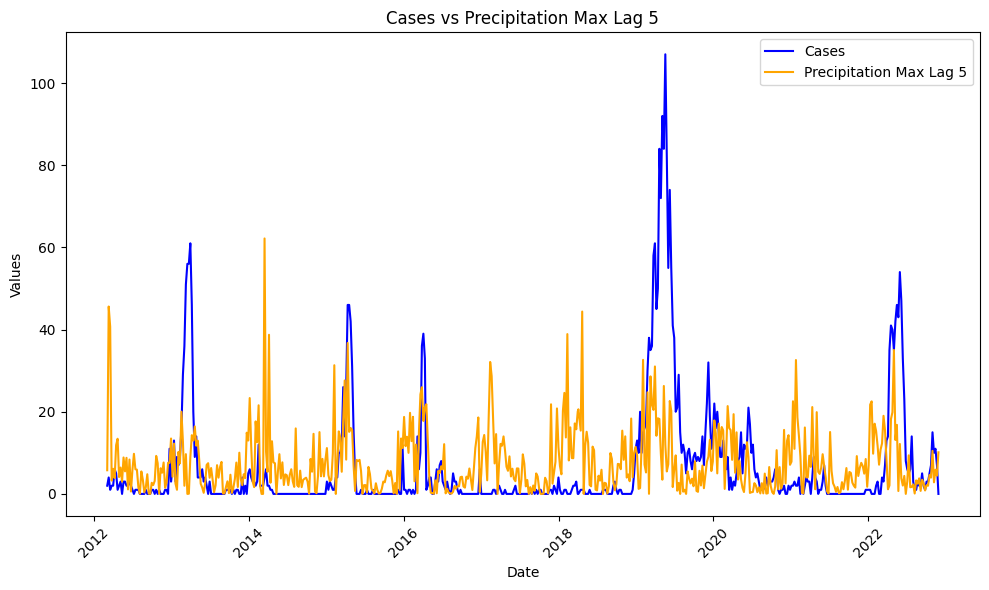

In [ ]:
compiled_functions.plot_forecast(y_train, y_test, sarimax_model, "SARIMAX Prediction of Dengue Cases - 1 year", X_test=Z_test)


In [82]:
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to exclude from scaling
#cases waw removed from scaling - some model need to scale that as well
#date_ordinal,year,month also need to scale according to the model
new_columns = ['cases']

# Select numeric columns excluding the ones in `new_columns`
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in new_columns]


scaler = MinMaxScaler()


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head(10)
# Verify the scaling



,date,cases,population,tempe_min,humidity_max,humidity_avg,humidity_min,temp_avg,temp_max,vim,...,precipitation_avg_ordinary_kriging,precipitation_max_ordinary_kriging,precipitation_avg_regression_kriging,precipitation_max_regression_kriging,long,lat,cases_lag1,cases_lag2,cases_lag3,cases_lag4
0,2012-01-29,2,0.0,0.657143,0.559211,0.216770,0.186074,0.813711,0.797297,0.641365,...,0.152529,0.110805,0.097417,0.092652,0.0,0.0,0.028037,0.018692,0.000000,0.009346
1,2012-02-05,1,0.0,0.692857,0.575658,0.087382,0.042797,0.937349,0.921171,0.663742,...,0.397760,0.733585,0.388427,0.733551,0.0,0.0,0.018692,0.028037,0.018692,0.000000
2,2012-02-12,3,0.0,0.721429,0.542763,0.319921,0.282832,0.804353,0.763514,0.684145,...,0.312931,0.650066,0.328339,0.654511,0.0,0.0,0.009346,0.018692,0.028037,0.018692
3,2012-02-19,3,0.0,0.807143,0.401316,0.226791,0.202821,0.873214,0.831081,0.701273,...,0.036074,0.064555,0.028153,0.052317,0.0,0.0,0.028037,0.009346,0.018692,0.028037
4,2012-02-26,2,0.0,0.750000,0.542763,0.092054,0.031633,0.950914,0.938063,0.716307,...,0.073472,0.098411,0.071757,0.098422,0.0,0.0,0.028037,0.028037,0.009346,0.018692
5,2012-03-04,2,0.0,0.735714,0.348684,0.172094,0.124670,0.836202,0.814189,0.729135,...,0.071802,0.086646,0.038806,0.061938,0.0,0.0,0.018692,0.028037,0.028037,0.009346
6,2012-03-11,4,0.0,0.635714,0.657895,0.439214,0.280972,0.718134,0.757883,0.740161,...,0.252437,0.246567,0.162982,0.190735,0.0,0.0,0.018692,0.018692,0.028037,0.028037
7,2012-03-18,1,0.0,0.657143,0.588816,0.325200,0.241896,0.760230,0.746622,0.750625,...,0.232131,0.246722,0.164754,0.215890,0.0,0.0,0.037383,0.018692,0.018692,0.028037
8,2012-03-25,2,0.0,0.721429,0.608553,0.410586,0.349819,0.752087,0.712838,0.758066,...,0.104966,0.066278,0.101748,0.066200,0.0,0.0,0.009346,0.037383,0.018692,0.018692
9,2012-04-01,2,0.0,0.678571,0.588816,0.276708,0.251200,0.824773,0.786036,0.762436,...,0.166706,0.226802,0.069896,0.103133,0.0,0.0,0.018692,0.009346,0.037383,0.018692


In [83]:
feature_cols = [
     'date','cases','temp_avg', 'humidity_avg',
    'precipitation_max_regression_kriging'  ,'cases_lag1'
     ,'cases_lag2'
     ,'cases_lag3'
     , 'cases_lag4'
]

df = df[feature_cols]

# Verify the new shapes
print(df.shape)

(566, 9)


In [84]:
df

,date,cases,temp_avg,humidity_avg,precipitation_max_regression_kriging,cases_lag1,cases_lag2,cases_lag3,cases_lag4
0,2012-01-29,2,0.813711,0.216770,0.092652,0.028037,0.018692,0.000000,0.009346
1,2012-02-05,1,0.937349,0.087382,0.733551,0.018692,0.028037,0.018692,0.000000
2,2012-02-12,3,0.804353,0.319921,0.654511,0.009346,0.018692,0.028037,0.018692
3,2012-02-19,3,0.873214,0.226791,0.052317,0.028037,0.009346,0.018692,0.028037
4,2012-02-26,2,0.950914,0.092054,0.098422,0.028037,0.028037,0.009346,0.018692
...,...,...,...,...,...,...,...,...,...
561,2022-10-30,15,0.551820,0.698869,0.178375,0.065421,0.046729,0.028037,0.028037
562,2022-11-06,10,0.607320,0.683309,0.250072,0.140187,0.065421,0.046729,0.028037
563,2022-11-13,11,0.680568,0.624159,0.131809,0.093458,0.140187,0.065421,0.046729
564,2022-11-20,7,0.728390,0.594346,0.234579,0.102804,0.093458,0.140187,0.065421


In [43]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

In [44]:
df['date'] = pd.to_datetime(df['date'])  # Ensure the date is in datetime format
df.set_index('date', inplace=True)


In [45]:
df

,cases,temp_avg,humidity_avg,precipitation_max_regression_kriging,lat,long
date,,,,,,
2012-01-29,2,0.813711,0.216770,0.092652,0.0,0.0
2012-02-05,1,0.937349,0.087382,0.733551,0.0,0.0
2012-02-12,3,0.804353,0.319921,0.654511,0.0,0.0
2012-02-19,3,0.873214,0.226791,0.052317,0.0,0.0
2012-02-26,2,0.950914,0.092054,0.098422,0.0,0.0
...,...,...,...,...,...,...
2022-10-30,15,0.551820,0.698869,0.178375,0.0,0.0
2022-11-06,10,0.607320,0.683309,0.250072,0.0,0.0
2022-11-13,11,0.680568,0.624159,0.131809,0.0,0.0


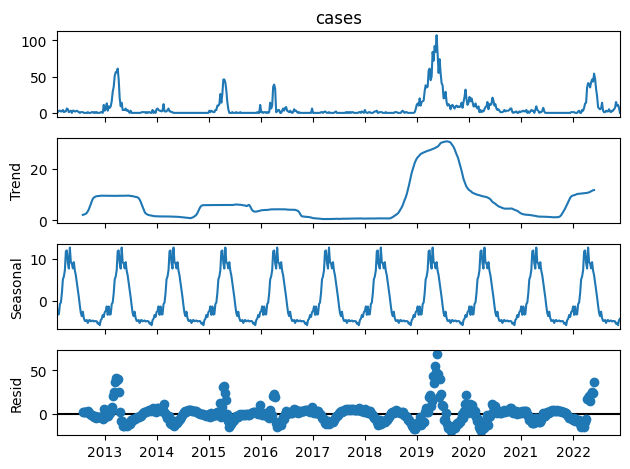

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result_decompose = seasonal_decompose(df['cases'], model='additive', period=52)
result_decompose.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

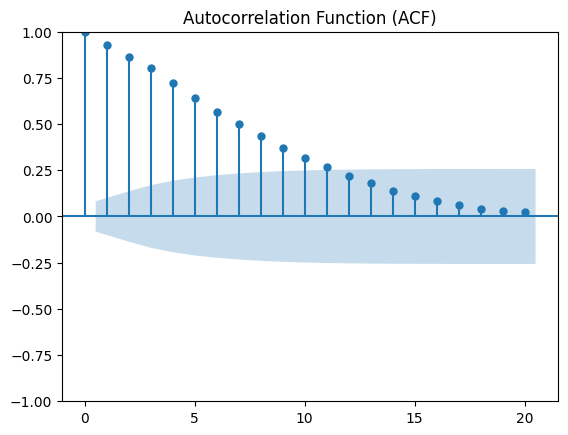

In [47]:
import statsmodels.graphics.tsaplots as tsa_plots

plt.figure(figsize=(10, 6))
tsa_plots.plot_acf(df['cases'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x600 with 0 Axes>

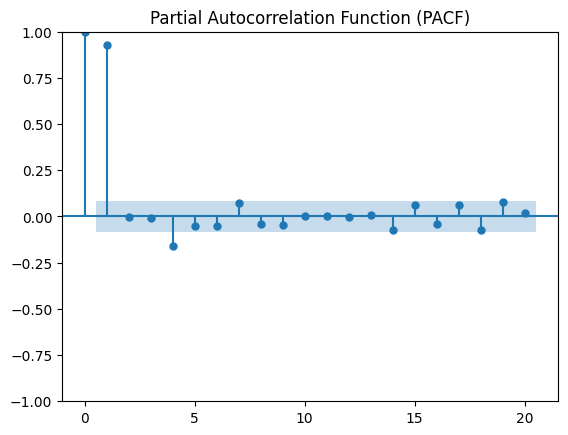

In [48]:
plt.figure(figsize=(10, 6))
tsa_plots.plot_pacf(df['cases'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [49]:

time_series = df['cases'] 

In [50]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(time_series)

# Extract and display the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -5.102603740587692
p-value: 1.3850971972311796e-05
Critical Values: {'1%': -3.442039359113542, '5%': -2.8666965134862514, '10%': -2.5695162601790758}


In [51]:
import pmdarima as pm
df

,cases,temp_avg,humidity_avg,precipitation_max_regression_kriging,lat,long
date,,,,,,
2012-01-29,2,0.813711,0.216770,0.092652,0.0,0.0
2012-02-05,1,0.937349,0.087382,0.733551,0.0,0.0
2012-02-12,3,0.804353,0.319921,0.654511,0.0,0.0
2012-02-19,3,0.873214,0.226791,0.052317,0.0,0.0
2012-02-26,2,0.950914,0.092054,0.098422,0.0,0.0
...,...,...,...,...,...,...
2022-10-30,15,0.551820,0.698869,0.178375,0.0,0.0
2022-11-06,10,0.607320,0.683309,0.250072,0.0,0.0
2022-11-13,11,0.680568,0.624159,0.131809,0.0,0.0
